In [1]:
from matplotlib import pyplot as plt
import pyzed.sl as sl
import cv2

In [2]:
# zed.close()
zed = sl.Camera()

In [3]:
init_params = sl.InitParameters()
init_params.camera_resolution = sl.RESOLUTION.AUTO # Use HD720 opr HD1200 video mode, depending on camera type.
init_params.camera_fps = 30 # Set fps at 30
init_params.depth_mode = sl.DEPTH_MODE.NONE
init_params.sdk_verbose = 1

In [5]:
zed.open(init_params)

[2024-08-22 11:42:25 UTC][ZED][INFO] Logging level INFO


SUCCESS

[2024-08-22 11:42:25 UTC][ZED][ERROR] [ZED] sl::Camera::Open has not been called, no Camera instance running.
[2024-08-22 11:42:25 UTC][ZED][ERROR] [ZED] sl::Camera::Open has not been called, no Camera instance running.
[2024-08-22 11:42:25 UTC][ZED][INFO] Using USB input... Switched to default resolution HD720
[2024-08-22 11:42:25 UTC][ZED][INFO] [Init]  Depth mode: NONE
[2024-08-22 11:42:27 UTC][ZED][INFO] [Init]  Camera successfully opened.
[2024-08-22 11:42:27 UTC][ZED][INFO] [Init]  Camera FW version: 1523
[2024-08-22 11:42:27 UTC][ZED][INFO] [Init]  Video mode: HD720@30
[2024-08-22 11:42:27 UTC][ZED][INFO] [Init]  Serial Number: S/N 17521925


In [6]:
zed.grab()

SUCCESS

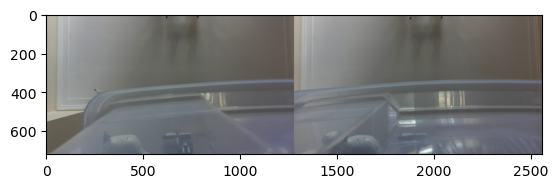

In [10]:
image = sl.Mat()
zed.retrieve_image(image, sl.VIEW.SIDE_BY_SIDE)
plt.imshow(cv2.cvtColor(image.numpy()[:, :, :3], cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(image.get_data()[:, :, :3], cv2.COLOR_BGR2RGB))

In [12]:
ts = zed.get_timestamp(sl.TIME_REFERENCE.CURRENT)

In [14]:
video_writer = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 30, (image.get_width(), image.get_height()))

for _ in range(100):
    if zed.grab() == sl.ERROR_CODE.SUCCESS:
        zed.retrieve_image(image, sl.VIEW.SIDE_BY_SIDE)
        frame = cv2.cvtColor(image.get_data()[:, :, :3], cv2.COLOR_BGR2RGB)
        video_writer.write(frame)

video_writer.release()
